<a href="https://colab.research.google.com/github/DrishtiMamtani/Call-Quality-Analysis/blob/master/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


0.196227537


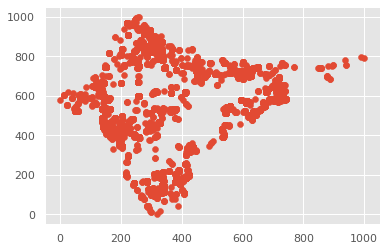

30715
For 0  number is  3584
For 1  number is  936
For 2  number is  1867
For 3  number is  1961
For 4  number is  2121
For 5  number is  893
For 6  number is  4710
For 7  number is  4172
For 8  number is  778
For 9  number is  4394
For 10  number is  2994
For 11  number is  2305


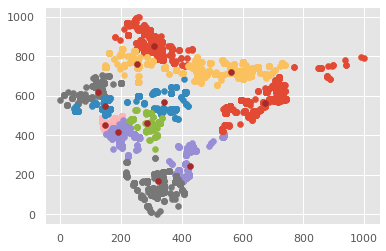

In [1]:
import pandas as pd
import numpy as np
import io
import copy
import random
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
pd.options.mode.chained_assignment = None  # default='warn'
df1=pd.read_csv("final_data.csv")
h=df1.shape[0]
df=df1.copy(deep=True)
print(df['Latitude'].iloc[0])
def scale_up():
    for i in range(h):
        val1=df['Latitude'].loc[i]
        val2=df['Longitude'].loc[i]
        df['Latitude'].iloc[i]=1000*val1
        df['Longitude'].iloc[i]=1000*val2
    # print(df['Latitude'].iloc[0])

def scale_down():
    for i in range(h):
        val1=df['Latitude'].loc[i]
        val2=df['Longitude'].loc[i]
        df['Latitude'].iloc[i]=val1/1000
        df['Longitude'].iloc[i]=val2/1000

scale_up()

X=df.to_numpy()
Latitude= 6
longitude=7
plt.scatter(X[:,7],X[:,6])
plt.show()

def distance(loc1, loc2):
    squared_dist=0
    for i in range(len(loc1)):
        squared_dist+=(loc1[i]-loc2[i])**2
    return squared_dist

def SSE(centroids,cluster):
    Sum_Squared_error=0
    for i in range(len(centroids)):
        SSE_temp=0
        for j in range(len(cluster)):
            if cluster[j]==i:
                instance=[X[j,6],X[j,7]]
                SSE_temp+=distance(instance, centroids[i])
        Sum_Squared_error+=SSE_temp
    return Sum_Squared_error
def K_Means_algo(num_cluster,num_epochs,tolerance_value):
    k=num_cluster
    epochs=num_epochs
    tolerance=tolerance_value
    centroids=[]
    prev_centroids=[]

    size=len(X)
    random_numbers=[]
    for i in range(k):
        random_numbers.append(random.randint(0,len(X)))
    random_numbers=np.asarray(random_numbers)
    for i in range(k):
        instance=[X[random_numbers[i],6],X[random_numbers[i],7]]
        centroids.append(instance)
        initialize=[0,0]
        prev_centroids.append(initialize)
    centroids=np.asarray(centroids)
    prev_centroids=np.asarray(prev_centroids)
    for i in range(epochs):
        distances=[]
        cluster=[]
        if i==0:
            prev_centroids=prev_centroids
        else:
            prev_centroids=copy.deepcopy(centroids)
        for j in range(size):
            point_instance=[X[j,6],X[j,7]]
            distance_with_centroid=[]
            for h in range(len(centroids)):
                distance_with_centroid.append(distance(point_instance,centroids[h]))

            distance_with_centroid=np.asarray(distance_with_centroid)
            cluster_value=np.argmin(distance_with_centroid)
            cluster.append(cluster_value)
        cluster=np.asarray(cluster)
        for j in range(len(centroids)):
            sum_latitude=0
            sum_longitude=0
            count_instance=0
            for h in range(size):
                if cluster[h]==j:
                    sum_latitude+=X[h,6]
                    sum_longitude+=X[h,7]
                    count_instance+=1
            if count_instance==0:
                continue
            curr_latitude=sum_latitude/count_instance
            cur_longitude=sum_longitude/count_instance
            centroids[j]=[curr_latitude,cur_longitude]
        error_previous_centroid=0
        for j in range(len(centroids)):
            error_previous_centroid+=distance(prev_centroids[j],centroids[j])
        prev_centroids=centroids
        if error_previous_centroid<=tolerance:
            break
        else:
            prev_centroids=centroids

    return centroids,cluster

def K_mean_evaluator():
    K_array=np.linspace(1,30,30)
    print(K_array)
    error_found=[]
    for i in range(1,31):
        centroids_obtained,clusters_obtained=K_Means_algo(i,500,0.0001)
        error_found.append(SSE(centroids_obtained,clusters_obtained))
    error_found=np.asarray(error_found)
    plt.plot(K_array,error_found)
    plt.xlabel('Number of Clusters')
    plt.ylabel('within-cluster sums of squares (WCSS)')
    plt.title('Elbow method to determine optimum number of clusters')
    plt.show()
# K_mean_evaluator()
# Best K found = 12
def final_K_Mean_clusterization():
    k=12
    temp_cent,temp_cluster=K_Means_algo(k,500,0.0001)
    print(len(temp_cluster))
    result = np.hstack((X, np.atleast_2d(temp_cluster).T))
    result=np.asarray(result)
    for i in range(0,k):
        c=0
        for j in range(len(temp_cluster)):
            temp_cluster[j]=(int)(temp_cluster[j])
            if temp_cluster[j]==i:
                c+=1
        print('For', i, ' number is ', c)
    for i in range(k):
        temp=[]
        for j in range(len(result)):
            if result[j,16]==i:
                temp.append(result[j])
        temp=np.asarray(temp)
        if len(temp)==0:
            continue
        plt.scatter(temp[:,7],temp[:,6])
    for i in range(k):
        plt.scatter(temp_cent[i,1],temp_cent[i,0],color='brown',label=(i+1))
    plt.show()
    np.savetxt('centroids.csv',temp_cent,delimiter=',',fmt='%s')
    np.savetxt('clustered_file.csv', result, delimiter=',',fmt='%s')
    df_centroid=pd.read_csv('centroids.csv',header=None)
    df_centroid.to_csv('final_centroid.csv',header=None,index=None)
    df_clustered=pd.read_csv('clustered_file.csv',header=None)
    df_clustered.to_csv('final_clustered.csv',header=None,index=None)

final_K_Mean_clusterization()


Enter the city: Lucknow


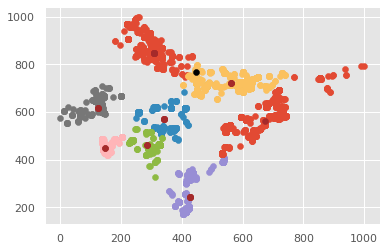

***Rankings***
Vodafone  :  3.25
Rjio  :  3.1018518518518516
Airtel  :  2.9246323529411766
Idea  :  2.9
BSNL  :  1.7142857142857142


In [2]:
import http.client, urllib.parse
import json
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

conn = http.client.HTTPConnection('geocode.xyz')


input_city=input("Enter the city: ")
address=input_city+', India'
params = urllib.parse.urlencode({
    'auth': '49799289990153474704x5228',
    'locate': address,
    'region': 'IN',
    'json': 1,
    })

conn.request('GET', '/?{}'.format(params))

res = conn.getresponse()
data = res.read()
s = data.decode('utf-8')
j = json.loads(s)
# print(j['latt'],j['longt'])
a=[float(j['latt']),float(j['longt'])]
k=8
def Sort(sub_li):
    sub_li.sort(key = lambda x: x[1])
    return sub_li
def distance(loc1, loc2):
    squared_dist=0
    for i in range(len(loc1)):
        squared_dist+=(loc1[i]-loc2[i])**2
    return squared_dist
def predict_ratings(clus_val):
    clustered_data=pd.read_csv('final_clustered.csv',header=None)
    clustered_data=np.asarray(clustered_data)
    count_jio=0
    count_bsnl=0
    c_vodafone=0
    count_idea=0
    count_airtel=0
    call_rating_jio=0
    call_rating_bsnl=0
    call_rating_idea=0
    call_rating_vodafone=0
    call_rating_airtel=0
    for i in range(len(clustered_data)):
        if clustered_data[i,16]==clus_val:
            if clustered_data[i,1]=='RJio':
                count_jio+=1
                call_rating_jio+=clustered_data[i,4]
            if clustered_data[i,1]=='Airtel':
                count_airtel+=1
                call_rating_airtel+=clustered_data[i,4]
            if clustered_data[i,1]=='Idea':
                count_idea+=1
                call_rating_idea+=clustered_data[i,4]
            if clustered_data[i,1]=='BSNL':
                count_bsnl+=1
                call_rating_bsnl+=clustered_data[i,4]
            if clustered_data[i,1]=='Vodafone':
                c_vodafone+=1
                call_rating_vodafone+=clustered_data[i,4]
    av_jio=call_rating_jio/count_jio
    av_idea=call_rating_idea/count_idea
    av_airtel=call_rating_airtel/count_airtel
    av_bsnl=call_rating_bsnl/count_bsnl
    av_vodafone=call_rating_vodafone/c_vodafone
    my_call_data=[]
    instance_jio=['Rjio',av_jio]
    my_call_data.append(instance_jio)
    instance_idea=['Idea',av_idea]
    my_call_data.append(instance_idea)
    instance_airtel=['Airtel',av_airtel]
    my_call_data.append(instance_airtel)
    instance_bsnl=['BSNL',av_bsnl]
    my_call_data.append(instance_bsnl)
    instance_voda=['Vodafone',av_vodafone]
    my_call_data.append(instance_voda)
    my_call_data.sort()
    return Sort(my_call_data)
def cluster_preprocess():
    centroid_values=pd.read_csv('final_centroid.csv',header=None)
    cluster_assigned=-1
    centroid_values=np.asarray(centroid_values)
    min_val=999999
    min_val_lat=8.25516609
    min_val_longt=69.0173913
    max_val_lat=32.42779667
    max_val_longt=95.61915753
    clustered_data=pd.read_csv('final_clustered.csv',header=None)
    clustered_data=np.asarray(clustered_data)

    normalized_loc_lat=((a[0]-min_val_lat)/(max_val_lat-min_val_lat))*1000
    normalized_loc_longt=((a[1]-min_val_longt)/(max_val_longt-min_val_longt))*1000
    city_location=[float(normalized_loc_lat),float(normalized_loc_longt)]
    for i in range(len(centroid_values)):
        temp_dist=distance(centroid_values[i],city_location)
        if temp_dist<= min_val:
            min_val=temp_dist
            cluster_assigned=i
    for i in range(k):
        tempo=[]
        for j in range(len(clustered_data)):
            if clustered_data[j,16]==i:
                tempo.append(clustered_data[j])
        tempo=np.asarray(tempo)
        if len(tempo)==0:
            continue
        plt.scatter(tempo[:,7],tempo[:,6])
        for i in range(k):
            plt.scatter(centroid_values[i,1],centroid_values[i,0],color='brown',label=(i+1))
    plt.scatter(city_location[1],city_location[0],color='black')
    plt.show()
    answer=predict_ratings(cluster_assigned)
    answer=np.asarray(answer)
    print('***Rankings***')
    for i in range(len(answer)):
        print(answer[len(answer)-i-1,0],' : ', answer[len(answer)-i-1,1])
cluster_preprocess()


In [0]:
def closest_centroid(instance1, centroids,current_cluster):
    closest_centroid=-1
    t_distance=999999999
    for i in range(len(centroids)):
        if i == current_cluster:
            continue
        temp_dist=distance(instance1,centroids[i])
        if temp_dist< t_distance:
            closest_centroid=i
            t_distance=temp_dist
    return closest_centroid


17


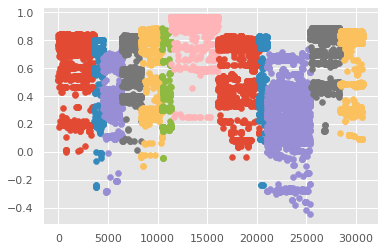

In [35]:

def silhouette(k):
    points=pd.read_csv('final_clustered.csv',header=None)
    points=np.asarray(points)
    clusters=pd.read_csv('final_centroid.csv',header=None)
    sil_array=[]
    clusters=np.asarray(clusters)
    print(len(points[0]))
    for i in range(len(points)):
        instance_points=[points[i,6],points[i,7]]
        closest_centro=closest_centroid(instance_points,clusters,points[i,16])
        b=0
        count=0
        for j in range(len(points)):
            if(points[j,16]==closest_centro):
                count+=1
                temp_clus_point=[points[j,6],points[j,7]]
                b+=distance(temp_clus_point,instance_points)
        b=b/count
        a=0
        count_self=0
        own_cluster=points[i,16]
        for j in range(len(points)):
            if (own_cluster==points[j,16]):
                count_self+=1
                temp_clus_point=[points[j,6],points[j,7]]
                a+=distance(temp_clus_point,instance_points)
        a=a/count_self

        sil_val=(b-a)/(max(b,a))
        temp_instance=[points[i,16],sil_val]
        sil_array.append(temp_instance)
    sil_array=np.asarray(sil_array)
    counting=0
    for i in range(k):
        temp=[]
        for j in range(len(sil_array)):
            if sil_array[j,0]==i:
                counting+=1
                temp_val=[counting,sil_array[j,1]]
                temp.append(temp_val)
        temp=np.asarray(temp)
        if len(temp)==0:
            continue
        plt.scatter(temp[:,0],temp[:,1])
    plt.show()
silhouette(12)